In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
# import pymysql
# import getpass
# password = getpass.getpass()

## 1. Loading Data and basic editing

### 1.1 Import .csv file into a dataframe using pandas

In [3]:
data = pd.read_csv('files/creditcardmarketing_clean.csv')

### 1.2 Make column names compliant with the **underscore_separated** naming convention

1.2.1 Defining a function for renaming

In [4]:
def rename_cols(df):
    """
    This function takes a pandas dataframe and changes its column names in place to lowercase and replacing
    spaces with underscores. Simply write
    >>> rename_cols(data)
    """
    df.columns = df.columns.str.replace(" ","_").str.lower()
    df.columns = df.columns.str.replace("#","n")
    pass

1.2.2 Call the rename function

In [5]:
rename_cols(data)

1.2.3 Getting some basic information about the data using the methods **head()** and **info()**, and the attribute **shape**.

In [6]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,"1160,75",1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,"147,25",39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,"276,5",367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211,2140.0,1357.0,982.0,365.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   n_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   n_credit_cards_held   18000 non-null  int64  
 9   n_homes_owned         18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  object 
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [8]:
data.shape

(18000, 17)

### 1.3 SQL Queries Section

SQL Queries Section

In [9]:
# connection_string = 'mysql+pymysql://root:' + password + '@localhost/creditcard'

# query = 'SELECT * FROM data'

# data = pd.read_sql_query(query,connection_string)
# data.head()

In [10]:
# data.shape

## 2. Data Cleaning

### 2.1 Check dataframe dtypes

In [11]:
data.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
n_bank_accounts_open      int64
overdraft_protection     object
credit_rating            object
n_credit_cards_held       int64
n_homes_owned             int64
household_size            int64
own_your_home            object
average_balance          object
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

### 2.2 Fix wrong dtypes

2.2.1 The column 'average_balance' dtype is object, but it should be float64. This is because the .csv file had dots instead of commas, so we use **replace** to fix it and then change the dtype.

In [12]:
data['average_balance'] = data['average_balance'].str.replace(',','.')
data['average_balance'] = data['average_balance'].astype(np.float)

In [13]:
data.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
n_bank_accounts_open      int64
overdraft_protection     object
credit_rating            object
n_credit_cards_held       int64
n_homes_owned             int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

### 2.3 Deal with null values

2.3.1 Calculate the percentage of null values among columns.

In [14]:
data.isna().sum()/data.shape[0]*100

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
n_bank_accounts_open    0.000000
overdraft_protection    0.000000
credit_rating           0.000000
n_credit_cards_held     0.000000
n_homes_owned           0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

2.3.2 The balance columns have null values. We decide to replace them with the mean of the column.

In [15]:
for i in ('average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'):
    data[i] = data[i].fillna(np.mean(data[i]))

In [16]:
# Now there should be 0 NaN values
data.isna().sum()/data.shape[0]*100

customer_number         0.0
offer_accepted          0.0
reward                  0.0
mailer_type             0.0
income_level            0.0
n_bank_accounts_open    0.0
overdraft_protection    0.0
credit_rating           0.0
n_credit_cards_held     0.0
n_homes_owned           0.0
household_size          0.0
own_your_home           0.0
average_balance         0.0
q1_balance              0.0
q2_balance              0.0
q3_balance              0.0
q4_balance              0.0
dtype: float64

### 2.4 Saving the clean dataframe into a new .csv file to use with Tableau and other software.

2.4.1 Create the .csv file

In [17]:
data.to_csv('files/creditcardmarketing_final.csv', index=False)

2.4.2 Load it again to make sure it's correct. Check with **head**.

In [18]:
data = pd.read_csv('files/creditcardmarketing_final.csv')
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


## 3. Separate the variables into **numerical** and **categorical**

We call the numerical variables **X_num** and the categorical ones **X_cat**

In [19]:
X_num = data.select_dtypes(include=np.number)
X_num.head()

,customer_number,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [20]:
X_cat = data.select_dtypes(include=(np.object, np.bool))
X_cat.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes


### 3.3 Check that no column is lost in the split

In [21]:
print(data.shape, X_num.shape, X_cat.shape)

(18000, 17) (18000, 10) (18000, 7)


## 4. Data wrangling

### 4.1 Numerical variables 

4.1.1 Drop useless columns

In [22]:
# customer_number is just an index so not a predictor
X_num = X_num.drop('customer_number', axis=1)

In [23]:
# Drop household_size (specify reasons behind this)
# X_num = X_num.drop('household_size', axis=1)
X_num

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17996,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17997,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17998,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


4.1.2 Check for correlations in numerical variables

Include the target to see it's correlation with the variables
To do so we transform it to 0s and 1s with get_dummies

In [24]:
X_num['offer_accepted'] = pd.get_dummies(data['offer_accepted'], drop_first=True)

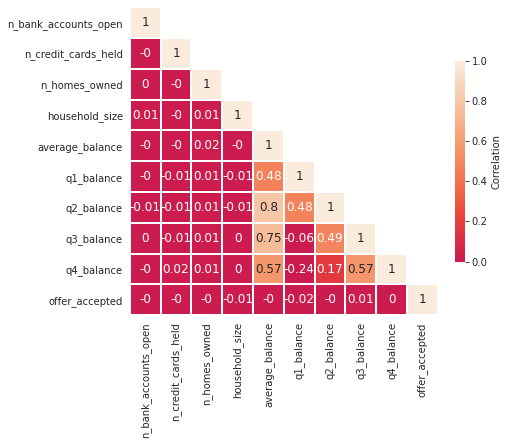

In [25]:
def plot_heatmap(df, size):
    corr = df.corr().round(2)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask, k=1)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(size, size))
        ax = sns.heatmap(corr, mask=mask, center=0, vmin=0, vmax=1, annot=True, square=True,
                         linewidths=1, annot_kws={'fontsize':'large'}, cmap='rocket',
                         cbar_kws={"orientation": "vertical", 'fraction': 0.03, 'label': 'Correlation'}
                        )

plot_heatmap(X_num, 6)

The column 'average_balance' shows a high correlation with the quartal balances, which is obvious as it is just the mean of it's sum. So we drop it.

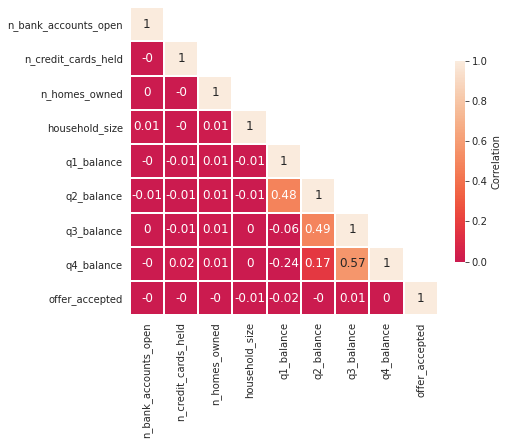

In [26]:
X_num = X_num.drop(['average_balance'], axis=1)
plot_heatmap(X_num, 6)

Now that we already checked the correlations, we can remove the target again

In [27]:
X_num = X_num.drop('offer_accepted', axis=1)

4.1.3 Dealing with discrete variables

Which ones in X_num are discrete?

In [28]:
values = []
pd.DataFrame()
for i in X_num:
    unique_values = X_num[i].unique().tolist()
    if len(unique_values)>20:
        values.append(i+' More than 20 unique values...')
    else:
        values.append(i+': '+str(unique_values)+'--> DISCRETE')
values


['n_bank_accounts_open: [1, 2, 3]--> DISCRETE',
 'n_credit_cards_held: [2, 1, 3, 4]--> DISCRETE',
 'n_homes_owned: [1, 2, 3]--> DISCRETE',
 'household_size: [4, 5, 2, 6, 3, 1, 8, 9]--> DISCRETE',
 'q1_balance More than 20 unique values...',
 'q2_balance More than 20 unique values...',
 'q3_balance More than 20 unique values...',
 'q4_balance More than 20 unique values...']

Move the discrete variables to the categoricals' dataframe using **insert**

In [29]:
X_cat.insert(loc=X_cat.shape[1], column='n_bank_accounts_open', value=X_num['n_bank_accounts_open'])
X_cat.insert(loc=X_cat.shape[1], column='n_credit_cards_held', value=X_num['n_credit_cards_held'])
X_cat.insert(loc=X_cat.shape[1], column='n_homes_owned', value=X_num['n_homes_owned'])
X_cat.insert(loc=X_cat.shape[1], column='household_size', value=X_num['household_size'])

Remove them from X_num

In [30]:
X_num = X_num.drop('n_bank_accounts_open', axis=1)
X_num = X_num.drop('n_credit_cards_held', axis=1)
X_num = X_num.drop('n_homes_owned', axis=1)
X_num = X_num.drop('household_size', axis=1)

4.1.4 Check the distribution using plots and transform if necesary

Define functions for plotting

In [31]:
def histplot_grid(df):
    """
    This function plots histograms for multiple columns of a dataframe
    """
    fig = plt.figure(figsize=(16,6))
    axes = []
    for count, val in enumerate(df):
        axes.append(fig.add_subplot(math.ceil(df.shape[1]/3), 3, count+1))
        sns.histplot(x=df[val], ax=axes[count], color='darkorange', kde=True)
    plt.plot

In [32]:
def boxplot_grid(df):
    """
    This function draws boxplots for multiple columns of a dataframe
    """
    fig = plt.figure(figsize=(16,6))
    axes = []
    for count, val in enumerate(df):
        axes.append(fig.add_subplot(math.ceil(df.shape[1]/3), 3, count+1))
        sns.boxplot(x=df[val], ax=axes[count], color='turquoise')
    plt.plot

In [33]:
import pylab 
import scipy.stats as stats

def probplot_grid(df):
    """
    This function draws probplots for multiple columns of a dataframe
    """
    fig = plt.figure(figsize=(12,8))
    axes = []
    for count, val in enumerate(df):
        axes.append(fig.add_subplot(math.ceil(df.shape[1]/2), 2, count+1))
        axes[count] = stats.probplot(x=df[val], dist="norm", plot=pylab)
    pylab.show()

Histograms

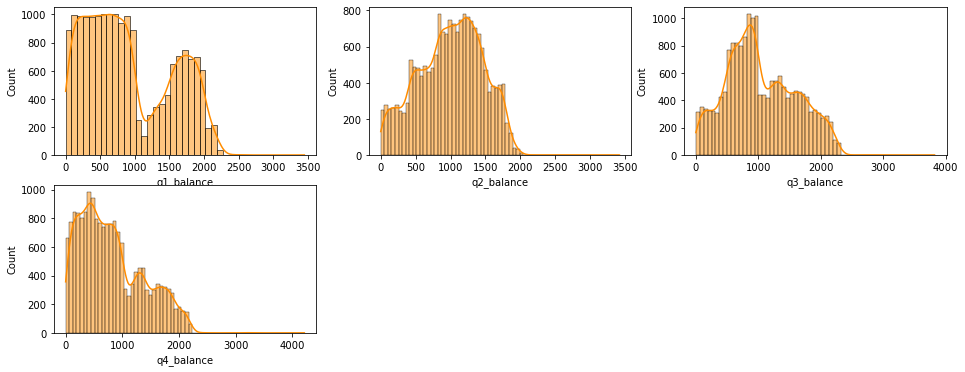

In [34]:
histplot_grid(X_num)

Boxplots

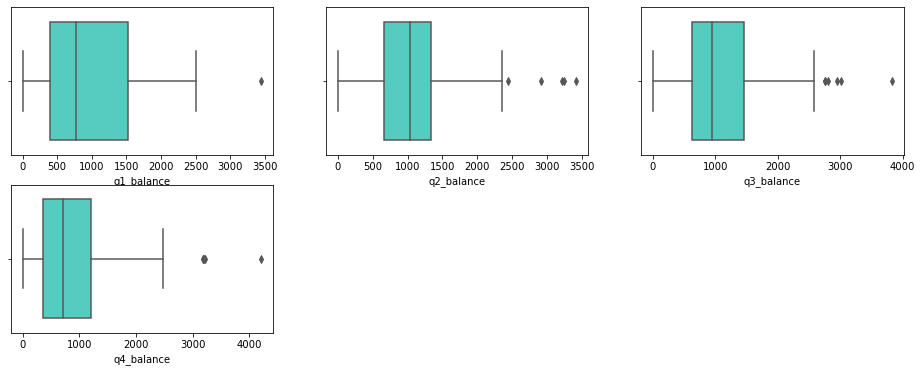

In [35]:
boxplot_grid(X_num)

The quartals' data is skewed to the right. We reshape it by removing the outliers

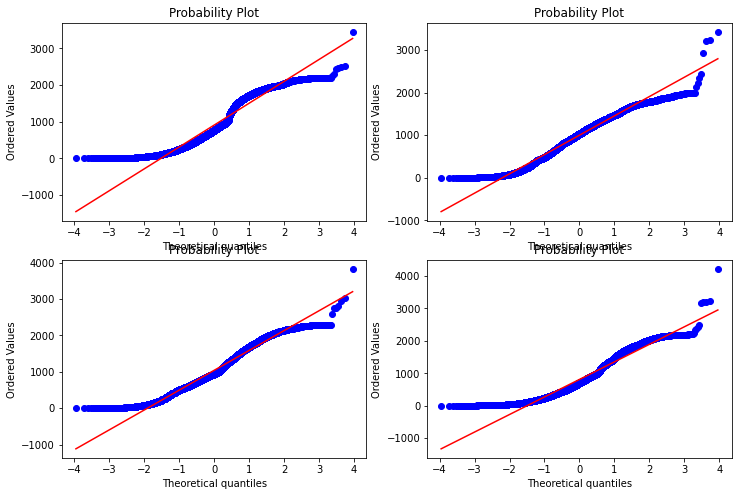

In [36]:
probplot_grid(X_num)

Function to remove outliers

In [37]:
def remove_outliers_iqr(arr, lwrmult, uprmult):
    iqr = np.percentile(arr,75) - np.percentile(arr,25)
    lower_limit = np.percentile(arr,25) - lwrmult*iqr
    upper_limit = np.percentile(arr,75) + uprmult*iqr
    df_final = arr[(arr>lower_limit) & (arr<upper_limit)]
    return df_final

In [38]:
X_num = X_num.apply(remove_outliers_iqr, lwrmult=6, uprmult=1.2)

Let's plot again to see the changes

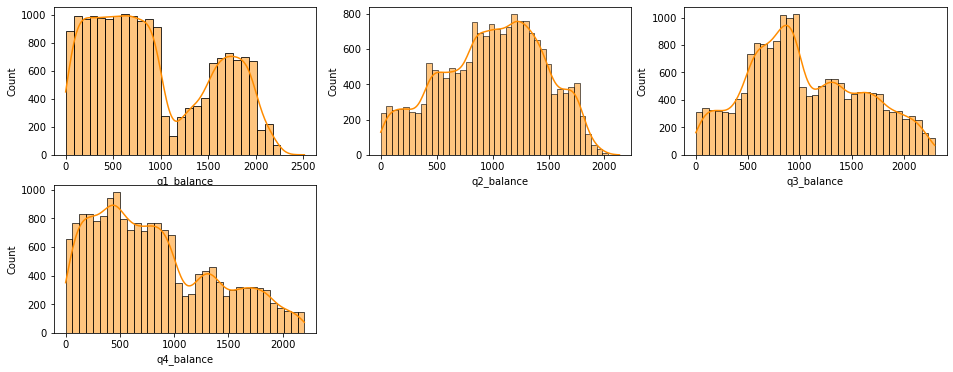

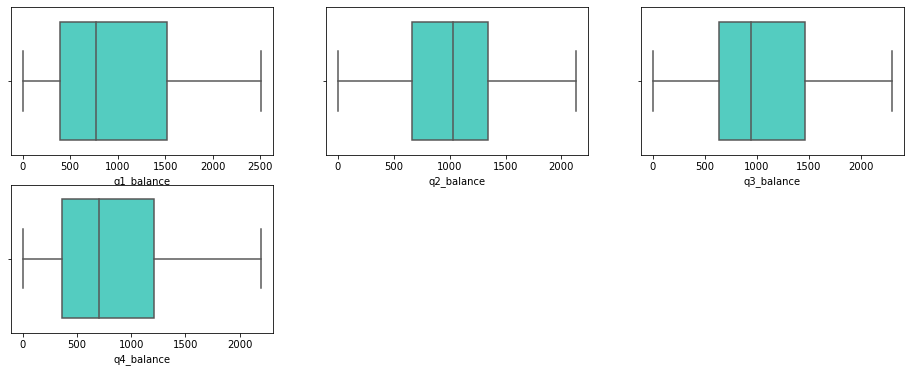

In [39]:
histplot_grid(X_num)
boxplot_grid(X_num)

Categorical variables

In [40]:
X_cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size
0,No,Air Miles,Letter,High,No,High,No,1,2,1,4
1,No,Air Miles,Letter,Medium,No,Medium,Yes,1,2,2,5
2,No,Air Miles,Postcard,High,No,Medium,Yes,2,2,1,2
3,No,Air Miles,Letter,Medium,No,High,No,2,1,1,4
4,No,Air Miles,Letter,Medium,No,Medium,Yes,1,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes,1,1,1,5
17996,No,Cash Back,Letter,High,No,Low,Yes,1,3,1,3
17997,No,Cash Back,Letter,High,No,Low,No,1,2,1,4
17998,No,Cash Back,Letter,Medium,No,Medium,Yes,1,4,2,2


In [41]:
def column_uniques(df):
    """
    This function takes a dataframe and shows the unique elements for every column
    """
    for q, v in enumerate(df):
        x = [v, str(len(df.iloc[:,q].unique())) + ' values', df.iloc[:,q].unique().tolist()]
        print(x)
    pass
column_uniques(X_cat)

['offer_accepted', '2 values', ['No', 'Yes']]
['reward', '3 values', ['Air Miles', 'Cash Back', 'Points']]
['mailer_type', '2 values', ['Letter', 'Postcard']]
['income_level', '3 values', ['High', 'Medium', 'Low']]
['overdraft_protection', '2 values', ['No', 'Yes']]
['credit_rating', '3 values', ['High', 'Medium', 'Low']]
['own_your_home', '2 values', ['No', 'Yes']]
['n_bank_accounts_open', '3 values', [1, 2, 3]]
['n_credit_cards_held', '4 values', [2, 1, 3, 4]]
['n_homes_owned', '3 values', [1, 2, 3]]
['household_size', '8 values', [4, 5, 2, 6, 3, 1, 8, 9]]


In [42]:
# Keep only selected features (eplain why -see Tableau plots-)
X_cat = X_cat.drop(['overdraft_protection', 'own_your_home'], axis=1)
X_cat

,offer_accepted,reward,mailer_type,income_level,credit_rating,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size
0,No,Air Miles,Letter,High,High,1,2,1,4
1,No,Air Miles,Letter,Medium,Medium,1,2,2,5
2,No,Air Miles,Postcard,High,Medium,2,2,1,2
3,No,Air Miles,Letter,Medium,High,2,1,1,4
4,No,Air Miles,Letter,Medium,Medium,1,2,1,6
...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,Low,1,1,1,5
17996,No,Cash Back,Letter,High,Low,1,3,1,3
17997,No,Cash Back,Letter,High,Low,1,2,1,4
17998,No,Cash Back,Letter,Medium,Medium,1,4,2,2


Check independence of categorical variables using chi-square

In [43]:
from scipy.stats import chi2_contingency

In [44]:
def check_chi2(df):
    stat, p, dof, expected = chi2_contingency(df, correction=False) 

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p)) 
    if p <= alpha: 
        return('The variables are dependent (the null hypothesis is rejected)') 
    else: 
        return('The variables are independent (the null hypothesis holds true)') 

In [45]:
# Check all the columns
for i in range(1, X_cat.shape[1]):
    for q in range(i+1, X_cat.shape[1]):
        data_crosstab = pd.crosstab(X_cat[X_cat.columns[i]], X_cat[X_cat.columns[q]], margins = False)
        print('Chi-Square Test of: \''+X_cat.columns[i]+'\' and \''+X_cat.columns[q]+'\'')
        print(check_chi2(data_crosstab))

Chi-Square Test of: 'reward' and 'mailer_type'
p value is 0.6380958767071728
The variables are independent (the null hypothesis holds true)
Chi-Square Test of: 'reward' and 'income_level'
p value is 0.6278956241169493
The variables are independent (the null hypothesis holds true)
Chi-Square Test of: 'reward' and 'credit_rating'
p value is 0.6778426226084249
The variables are independent (the null hypothesis holds true)
Chi-Square Test of: 'reward' and 'n_bank_accounts_open'
p value is 0.052373863254967505
The variables are independent (the null hypothesis holds true)
Chi-Square Test of: 'reward' and 'n_credit_cards_held'
p value is 0.4430310888263659
The variables are independent (the null hypothesis holds true)
Chi-Square Test of: 'reward' and 'n_homes_owned'
p value is 0.8162377895055186
The variables are independent (the null hypothesis holds true)
Chi-Square Test of: 'reward' and 'household_size'
p value is 0.8240406696516465
The variables are independent (the null hypothesis holds

Define the target Y and drop it from the features' table

In [46]:
y = X_cat['offer_accepted']
# X = X.drop('offer_accepted', axis=1)

## 5. Standardize and encode

### 5.1 Standardize numerical variables

Using **Standard Scaler**

In [47]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_num)
X_num_standardized = pd.DataFrame(transformer.transform(X_num))
X_num_standardized

,0,1,2,3
0,1.224930,-0.267042,0.097329,0.346785
1,-1.406758,-1.959107,-1.745601,-0.796182
2,-0.877191,-1.419226,-1.624189,-1.019025
3,1.078008,1.670823,0.140820,-0.700935
4,1.985375,0.786384,-0.107441,-0.797979
...,...,...,...,...
17994,-1.250148,-2.049087,-1.758286,-0.738674
17995,0.118976,-0.128780,-0.178114,-0.492469
17996,0.012416,-0.508452,0.233238,1.230967
17997,-0.459027,-0.034410,-0.319459,1.448419


### 5.2 Encode categorical variables

One-Hot encoding using **get_dummies**

In [48]:
X_cat_encoded = pd.get_dummies(X_cat.drop('offer_accepted', axis=1), drop_first=True)
X_cat_encoded

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,credit_rating_Low,credit_rating_Medium
0,1,2,1,4,0,0,0,0,0,0,0
1,1,2,2,5,0,0,0,0,1,0,1
2,2,2,1,2,0,0,1,0,0,0,1
3,2,1,1,4,0,0,0,0,1,0,0
4,1,2,1,6,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,1,0,0,0,0,1,0
17996,1,3,1,3,1,0,0,0,0,1,0
17997,1,2,1,4,1,0,0,0,0,1,0
17998,1,4,2,2,1,0,0,0,1,0,1


### 5.3 Put all the features together

Using **concat**

In [49]:
X = pd.DataFrame(pd.concat([X_num_standardized, X_cat_encoded, y], axis=1))
X

,0,1,2,3,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,credit_rating_Low,credit_rating_Medium,offer_accepted
0,1.224930,-0.267042,0.097329,0.346785,1,2,1,4,0,0,0,0,0,0,0,No
1,-1.406758,-1.959107,-1.745601,-0.796182,1,2,2,5,0,0,0,0,1,0,1,No
2,-0.877191,-1.419226,-1.624189,-1.019025,2,2,1,2,0,0,1,0,0,0,1,No
3,1.078008,1.670823,0.140820,-0.700935,2,1,1,4,0,0,0,0,1,0,0,No
4,1.985375,0.786384,-0.107441,-0.797979,1,2,1,6,0,0,0,0,1,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.118976,-0.128780,-0.178114,-0.492469,1,1,1,5,1,0,0,0,0,1,0,No
17996,0.012416,-0.508452,0.233238,1.230967,1,3,1,3,1,0,0,0,0,1,0,No
17997,-0.459027,-0.034410,-0.319459,1.448419,1,2,1,4,1,0,0,0,0,1,0,No
17998,-1.041873,0.832471,1.697435,-0.370265,1,4,2,2,1,0,0,0,1,0,1,No


There are some null values generated from the iqr transform. We drop them here

In [50]:
X = X.dropna()

Redefine the target so the number of datapoints match

In [51]:
y = X['offer_accepted']
X = X.drop('offer_accepted', axis=1)

## 6. Deal with data imbalance 

Check the target ti see if there is imbalance 

In [52]:
y.value_counts()

No     16966
Yes     1023
Name: offer_accepted, dtype: int64

The data is very imbalanced, so we do oversampling with **SMOTE**

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(X, y)
y_sm.value_counts()

Yes    16966
No     16966
Name: offer_accepted, dtype: int64

## 7. Test-train split

Separate 40% of the data for testing

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.4)

## 8. Training Predictive Models

### 8.1 Logistic Regression Model

Build and train the model

In [55]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

Make predictions

In [56]:
y_predicted_lr = model_lr.predict(X_test)

Check score

In [57]:
model_lr.score(X_test, y_test)

0.7181168496279379

### 8.2 KNN Classifier

Build and train the model

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

Make predictions

In [59]:
y_predicted_knn = model_knn.predict(X_test)

Check score

In [60]:
model_knn.score(X_test, y_test)

0.8286303691151551

### 8.3 Decision Tree Classifier

Build and train the model

In [61]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Make predictions

In [62]:
y_predicted_tree = model_tree.predict(X_test)

Check score

In [63]:
model_tree.score(X_test, y_test)

0.8447653429602888

### 8.4 Random Forest Classifier

Build and train the model

In [64]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

RandomForestClassifier()

Make predictions

In [65]:
y_predicted_forest = model_forest.predict(X_test)

Check score

In [66]:
model_forest.score(X_test, y_test)

0.9221248066013409

## 9. Validation of the model

 ### 9.1 Evaluate with Confusion Matrix

In [67]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_lr = confusion_matrix(y_test, y_predicted_lr)
cm_knn = confusion_matrix(y_test, y_predicted_knn)
cm_tree = confusion_matrix(y_test, y_predicted_tree)
cm_forest = confusion_matrix(y_test, y_predicted_forest)

In [68]:
cm_lr

array([[4704, 2069],
       [1757, 5043]], dtype=int64)

In [69]:
def plot_cm(x, title):
    plt.imshow(x, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(title)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(x[i][j]))
    plt.show()
    pass

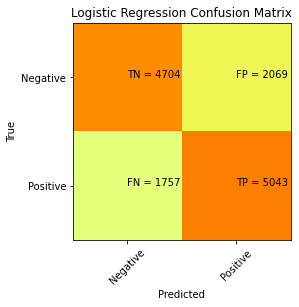

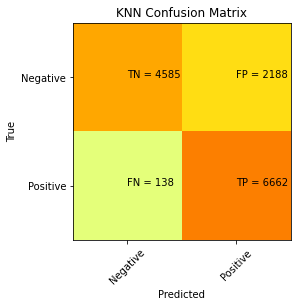

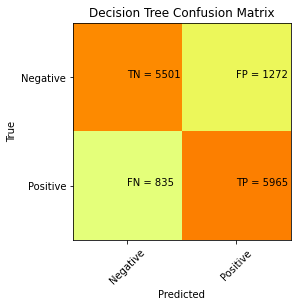

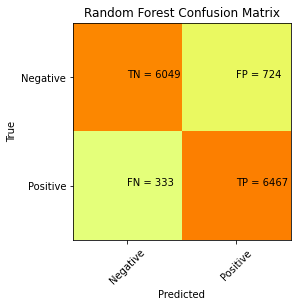

In [70]:
plot_cm(cm_lr, 'Logistic Regression Confusion Matrix')
plot_cm(cm_knn, 'KNN Confusion Matrix')
plot_cm(cm_tree, 'Decision Tree Confusion Matrix')
plot_cm(cm_forest, 'Random Forest Confusion Matrix')

### 9.2 Evaluate with ROC and AUC

In [71]:
y_test.unique()

array(['Yes', 'No'], dtype=object)

In [72]:
probs_lr = model_lr.predict_proba(X_test)[:, 1]
probs_knn = model_knn.predict_proba(X_test)[:, 1]
probs_tree = model_tree.predict_proba(X_test)[:, 1]
probs_forest = model_forest.predict_proba(X_test)[:, 1]

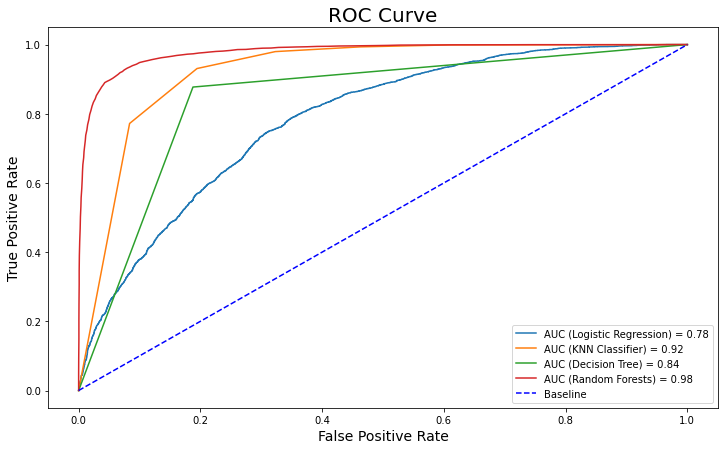

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test.replace({'Yes': 1, 'No': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_knn = roc_auc_score(y_test_int, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_int, probs_knn)

auc_tree = roc_auc_score(y_test_int, probs_tree)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test_int, probs_tree)

auc_forest = roc_auc_score(y_test_int, probs_forest)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test_int, probs_forest)

plt.figure(figsize=(12, 7))

plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN Classifier) = {auc_knn:.2f}')
plt.plot(fpr_tree, tpr_tree, label=f'AUC (Decision Tree) = {auc_tree:.2f}')
plt.plot(fpr_forest, tpr_forest, label=f'AUC (Random Forests) = {auc_forest:.2f}')

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

### 10. Identify Overfitting

>1, train: 0.637, test: 0.633
>2, train: 0.642, test: 0.637
>3, train: 0.680, test: 0.684
>4, train: 0.698, test: 0.698
>5, train: 0.711, test: 0.707
>6, train: 0.716, test: 0.713
>7, train: 0.738, test: 0.727
>8, train: 0.756, test: 0.738
>9, train: 0.783, test: 0.756
>10, train: 0.810, test: 0.766
>11, train: 0.833, test: 0.782
>12, train: 0.854, test: 0.793
>13, train: 0.877, test: 0.799
>14, train: 0.895, test: 0.804
>15, train: 0.916, test: 0.813
>16, train: 0.933, test: 0.824
>17, train: 0.946, test: 0.830
>18, train: 0.958, test: 0.838
>19, train: 0.968, test: 0.840
>20, train: 0.975, test: 0.838


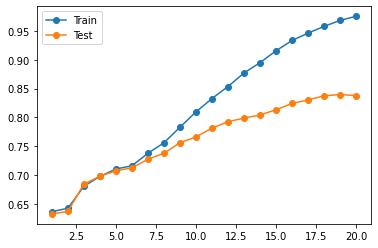

In [74]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
# X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 0.701, test: 0.706
>2, train: 0.711, test: 0.718
>3, train: 0.711, test: 0.718
>4, train: 0.711, test: 0.718
>5, train: 0.711, test: 0.718
>6, train: 0.711, test: 0.718
>7, train: 0.711, test: 0.718
>8, train: 0.711, test: 0.718
>9, train: 0.711, test: 0.718
>10, train: 0.711, test: 0.718
>11, train: 0.711, test: 0.718
>12, train: 0.711, test: 0.718
>13, train: 0.711, test: 0.718
>14, train: 0.711, test: 0.718
>15, train: 0.711, test: 0.718
>16, train: 0.711, test: 0.718
>17, train: 0.711, test: 0.718
>18, train: 0.711, test: 0.718
>19, train: 0.711, test: 0.718
>20, train: 0.711, test: 0.718


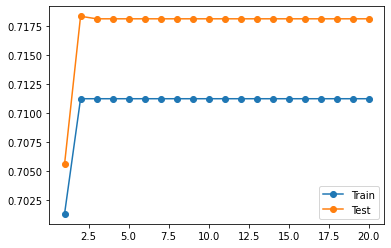

In [75]:
# evaluate logistic regression performance on train and test sets with different number of iterations
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a model for each depth
for i in values:
    model = LogisticRegression(max_iter=i*10)
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 1.000, test: 0.884
>2, train: 0.988, test: 0.887
>3, train: 0.912, test: 0.846
>4, train: 0.922, test: 0.860
>5, train: 0.875, test: 0.829
>6, train: 0.890, test: 0.845
>7, train: 0.852, test: 0.817
>8, train: 0.866, test: 0.834
>9, train: 0.837, test: 0.811
>10, train: 0.852, test: 0.821
>11, train: 0.829, test: 0.801
>12, train: 0.843, test: 0.816
>13, train: 0.820, test: 0.798
>14, train: 0.832, test: 0.811
>15, train: 0.814, test: 0.796
>16, train: 0.825, test: 0.807
>17, train: 0.809, test: 0.790
>18, train: 0.818, test: 0.799
>19, train: 0.803, test: 0.785
>20, train: 0.812, test: 0.794


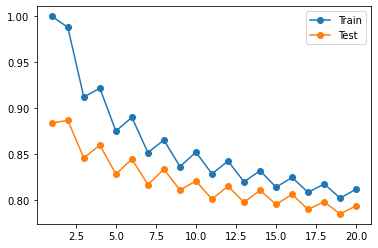

In [76]:
# evaluate knn performance on train and test sets with different number of iterations
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a model for each depth
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()